In [69]:
import pandas as pd
import numpy as np

 # Read Data

In [70]:
df=pd.read_csv('E:\\Desktop\\SLIIT\\colombo_rh_2012-2018.csv',parse_dates=True)

print('Shape of data',df.shape)
print ('\nNull values in data :\n',df.isnull().sum())
df.head()

Shape of data (4403, 7)

Null values in data :
 station_id       0
station_name     0
element_name     0
year             0
month            0
day              0
obs_val         20
dtype: int64


,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0


In [71]:
df=df.dropna()
print('Shape of data',df.shape)
print ('\nNull values in data\n',df.isnull().sum())
df.head()

Shape of data (4383, 7)

Null values in data
 station_id      0
station_name    0
element_name    0
year            0
month           0
day             0
obs_val         0
dtype: int64


,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0


In [72]:
#finding the unique values present
print(df['element_name'].unique())
print(df['year'].unique())

['RHMAX' 'RHMIN']
[2012 2013 2014 2015 2016 2017 2018]


In [73]:
#max relative hmidity is recorded for years 2012-2018
df[df['element_name'] == 'RHMAX']['year'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [74]:
#but min relative hmidity is recorded only for years 2015-2018
df[df['element_name'] == 'RHMIN']['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [75]:
#making the date column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

df.head()

,station_id,station_name,element_name,year,month,day,obs_val,date
0,43466,COLOMBO,RHMAX,2012,1,1,91.0,2012-01-01
1,43466,COLOMBO,RHMAX,2012,1,2,90.0,2012-01-02
2,43466,COLOMBO,RHMAX,2012,1,3,89.0,2012-01-03
3,43466,COLOMBO,RHMAX,2012,1,4,89.0,2012-01-04
4,43466,COLOMBO,RHMAX,2012,1,5,95.0,2012-01-05


In [76]:
df1 = df.drop(['station_id', 'station_name','year', 'month', 'day'], axis=1)
df1 = df1.set_index('date')
df1.head()

,element_name,obs_val
date,,
2012-01-01,RHMAX,91.0
2012-01-02,RHMAX,90.0
2012-01-03,RHMAX,89.0
2012-01-04,RHMAX,89.0
2012-01-05,RHMAX,95.0


In [77]:
df1.loc['2015-01-01']

,element_name,obs_val
date,,
2015-01-01,RHMAX,94.0
2015-01-01,RHMIN,76.0


In [78]:
df1.loc['2012-01-01']

element_name    RHMAX
obs_val          91.0
Name: 2012-01-01 00:00:00, dtype: object

In [79]:
def get_avg_relhum(df, idx):
    """
    Calculates the average relative humidity for a given index, based on the values in the
    'rhmax' and 'rhmin' columns of the DataFrame.
    
    Parameters:
        df (Pandas DataFrame): The DataFrame containing the relative humidity data.
        idx (int or str): The index value for which to calculate the average relative humidity.
    
    Returns:
        float: The average relative humidity for the given index.
    """
    # Get the values in the 'rhmax' and 'rhmin' columns for the given index
    rhmax = df.loc[(df.index == idx) & (df['element_name'] == 'RHMAX'), 'obs_val']
    rhmin = df.loc[(df.index == idx) & (df['element_name'] == 'RHMIN'), 'obs_val']
    
    # If both 'rhmax' and 'rhmin' values are present, calculate the average
    if not rhmax.empty and not rhmin.empty:
        avg_rh = (rhmax.iloc[0] + rhmin.iloc[0]) / 2.0
    # Otherwise, use the 'rhmax' value as the average
    else:
        avg_rh = rhmax.iloc[0]
    
    return avg_rh


In [80]:
#testing the function
get_avg_relhum(df1,'2015-01-01')

85.0

In [81]:
get_avg_relhum(df1,'2012-01-01')

91.0

In [82]:
# Creating a new column 'avg_rh' and apply the 'get_avg_relhum()' function to each index
df1['avg_rh'] = df1.index.map(lambda x: get_avg_relhum(df1, x))
df1.head()

,element_name,obs_val,avg_rh
date,,,
2012-01-01,RHMAX,91.0,91.0
2012-01-02,RHMAX,90.0,90.0
2012-01-03,RHMAX,89.0,89.0
2012-01-04,RHMAX,89.0,89.0
2012-01-05,RHMAX,95.0,95.0


In [83]:
#as you can see both max and min RH has the same average RH
df1.loc['2015-01-01']

,element_name,obs_val,avg_rh
date,,,
2015-01-01,RHMAX,94.0,85.0
2015-01-01,RHMIN,76.0,85.0


In [84]:
df1.loc['2012-01-01']

element_name    RHMAX
obs_val          91.0
avg_rh           91.0
Name: 2012-01-01 00:00:00, dtype: object

In [85]:
def check_duplicate_index(df):
    years = range(2012, 2019)
    for year in years:
        year_df = df[df.index.year == year]
        if year_df.index.duplicated().any():
            print(f"Duplicate index found for year {year}")

In [86]:
check_duplicate_index(df1)

Duplicate index found for year 2015
Duplicate index found for year 2016
Duplicate index found for year 2017
Duplicate index found for year 2018


In [87]:

print('Shape of data',df1.shape)
df1.loc['2018-12-31']

Shape of data (4383, 3)


,element_name,obs_val,avg_rh
date,,,
2018-12-31,RHMAX,82.0,74.5
2018-12-31,RHMIN,67.0,74.5
2018-12-31,RHMAX,82.0,74.5


In [88]:
print(df1.loc['2017-12-31'])
print(df1.loc['2018-01-01'])
#RHMAX year 2018 has been repeated again

           element_name  obs_val  avg_rh
date                                    
2017-12-31        RHMAX     85.0    73.5
2017-12-31        RHMIN     62.0    73.5
           element_name  obs_val  avg_rh
date                                    
2018-01-01        RHMAX     88.0    74.5
2018-01-01        RHMIN     61.0    74.5
2018-01-01        RHMAX     88.0    74.5


In [164]:
# Reset the index to a sequential integer index
df2 = df1.reset_index(drop=False)
print('Shape of data',df2.shape)
df2.head()



Shape of data (4383, 4)


,date,element_name,obs_val,avg_rh
0,2012-01-01,RHMAX,91.0,91.0
1,2012-01-02,RHMAX,90.0,90.0
2,2012-01-03,RHMAX,89.0,89.0
3,2012-01-04,RHMAX,89.0,89.0
4,2012-01-05,RHMAX,95.0,95.0


In [165]:
 df2.loc[df2['date'] == '2018-12-31']

,date,element_name,obs_val,avg_rh
2921,2018-12-31,RHMAX,82.0,74.5
4017,2018-12-31,RHMIN,67.0,74.5
4382,2018-12-31,RHMAX,82.0,74.5


In [166]:
#removing duplicated year 2018
df3 = df2.loc[0:2921]
print('Shape of data',df3.shape)
df3.loc[df3['date'] == '2018-12-31']

Shape of data (2922, 4)


,date,element_name,obs_val,avg_rh
2921,2018-12-31,RHMAX,82.0,74.5


In [167]:
df3

,date,element_name,obs_val,avg_rh
0,2012-01-01,RHMAX,91.0,91.0
1,2012-01-02,RHMAX,90.0,90.0
2,2012-01-03,RHMAX,89.0,89.0
3,2012-01-04,RHMAX,89.0,89.0
4,2012-01-05,RHMAX,95.0,95.0
...,...,...,...,...
2917,2018-12-27,RHMAX,90.0,83.0
2918,2018-12-28,RHMAX,88.0,80.5
2919,2018-12-29,RHMAX,76.0,72.0
2920,2018-12-30,RHMAX,81.0,68.0


In [168]:
df3.loc[df3['date'] == '2015-12-31']

,date,element_name,obs_val,avg_rh
1460,2015-12-31,RHMAX,85.0,74.0
1825,2015-12-31,RHMIN,63.0,74.0


In [169]:
df3.loc[df3['date'] == '2015-01-01']

,date,element_name,obs_val,avg_rh
1096,2015-01-01,RHMAX,94.0,85.0
1461,2015-01-01,RHMIN,76.0,85.0


In [170]:
#removing duplicated year 2015, we only need to remove the rows with value 'RHMIN' for element_name colmn
count = df3['element_name'].value_counts()['RHMIN'] #getting the count to make sure only 2015 year has 'RHMIN'
count

365

In [171]:
#removing those rows
df3 = df3[df3['element_name'] != 'RHMIN']
df3

,date,element_name,obs_val,avg_rh
0,2012-01-01,RHMAX,91.0,91.0
1,2012-01-02,RHMAX,90.0,90.0
2,2012-01-03,RHMAX,89.0,89.0
3,2012-01-04,RHMAX,89.0,89.0
4,2012-01-05,RHMAX,95.0,95.0
...,...,...,...,...
2917,2018-12-27,RHMAX,90.0,83.0
2918,2018-12-28,RHMAX,88.0,80.5
2919,2018-12-29,RHMAX,76.0,72.0
2920,2018-12-30,RHMAX,81.0,68.0


In [172]:
df3 = df3.set_index('date')
columns_to_drop = ['element_name', 'obs_val']  # list of column names to drop
df4 = df3.drop(columns=columns_to_drop) 
df4

,avg_rh
date,
2012-01-01,91.0
2012-01-02,90.0
2012-01-03,89.0
2012-01-04,89.0
2012-01-05,95.0
...,...
2018-12-27,83.0
2018-12-28,80.5
2018-12-29,72.0


In [173]:
df3

,element_name,obs_val,avg_rh
date,,,
2012-01-01,RHMAX,91.0,91.0
2012-01-02,RHMAX,90.0,90.0
2012-01-03,RHMAX,89.0,89.0
2012-01-04,RHMAX,89.0,89.0
2012-01-05,RHMAX,95.0,95.0
...,...,...,...
2018-12-27,RHMAX,90.0,83.0
2018-12-28,RHMAX,88.0,80.5
2018-12-29,RHMAX,76.0,72.0


# Plot Your Data

<AxesSubplot:xlabel='date'>

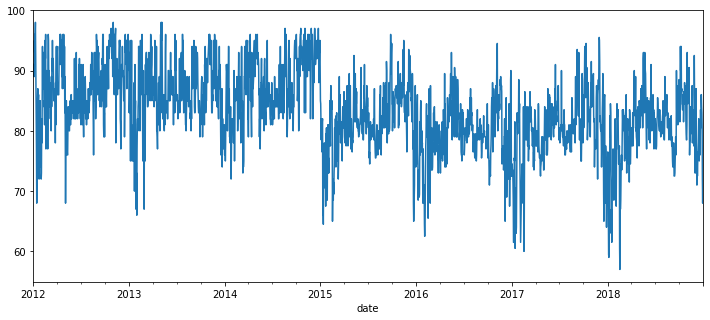

In [174]:
df4['avg_rh'].plot(figsize=(12,5))
#stationary? const mean, const var, no seasonality; seems almost stationary

# Check For Stationarity using ADF test

In [175]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)
  if dftest[1] < 0.05:
    print("Data is stationary")
  else:
    print("Data is not stationary")

In [176]:
adf_test(df4['avg_rh'])
#pvalue < 0.05, therefore data is stationary

1. ADF :  -5.526185940888258
2. P-Value :  1.8305154517245229e-06
3. Num Of Lags :  17
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2539
5. Critical Values :
	 1% :  -3.432928150289924
	 5% :  -2.862679020794315
	 10% :  -2.5673763435766364
Data is stationary


# Figure Out Order for ARIMA Model

In [177]:
from pmdarima.arima import auto_arima
# Ignore harmless warnings
#import warnings
#warnings.filterwarnings("ignore")

In [186]:
from pmdarima.arima import auto_arima

model = auto_arima(df4['avg_rh'], trace= True, seasonal=True, suppress_warnings=True, seasonal_test='ocsb')
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14407.600, Time=3.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14858.039, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14726.607, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14648.067, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14856.045, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14406.634, Time=2.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14509.093, Time=0.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14405.654, Time=1.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14406.655, Time=1.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14655.350, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=14403.731, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=14646.085, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=14724.616, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=14404.733, Time=0.56 sec
 ARIMA(1,1,2)(0,0,0

In [187]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2557
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -7198.865
Date:                Mon, 17 Apr 2023   AIC                          14403.731
Time:                        11:02:24   BIC                          14421.269
Sample:                    01-01-2012   HQIC                         14410.091
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5688      0.018     31.913      0.000       0.534       0.604
ma.L1         -0.9328      0.008   -115.430      0.000      -0.949      -0.917
sigma2        16.3576      0.349     46.827      0.000      15.673      17.042
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):               272.21
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Split Data into Training and Testing

In [105]:
print(df4.shape)
df4.index = pd.date_range(start='2012-01-01', end='2018-12-31', freq='D') #providing freuency info
df4.head()


(2557, 1)


,avg_rh
2012-01-01,91.0
2012-01-02,90.0
2012-01-03,89.0
2012-01-04,89.0
2012-01-05,95.0


In [206]:
train=df4.iloc[:-30]
test=df4.iloc[-30:]
print(train.shape,test.shape)
print("train ==>",train.iloc[0],"\n",train.iloc[-1])
print("test ==>",test.iloc[0],"\n",test.iloc[-1])

(2527, 1) (30, 1)
train ==> avg_rh    91.0
Name: 2012-01-01 00:00:00, dtype: float64 
 avg_rh    73.0
Name: 2018-12-01 00:00:00, dtype: float64
test ==> avg_rh    73.0
Name: 2018-12-02 00:00:00, dtype: float64 
 avg_rh    74.5
Name: 2018-12-31 00:00:00, dtype: float64


## Train the Model

In [215]:
import statsmodels.api as sm

train.index.freq = 'D'

# Fit SARIMAX model to data
model = sm.tsa.SARIMAX(train['avg_rh'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))

fitted_model = model.fit()

# Create new SARIMAX model with same parameters as fitted model
new_model = sm.tsa.SARIMAX(train['avg_rh'], order=(1, 1, 1), seasonal_order=(0,0,0,0))

# Fit new model using fit() method and obtain new estimator
new_estimator = new_model.fit()


# Make Predictions on Test Set

<AxesSubplot:xlabel='date'>

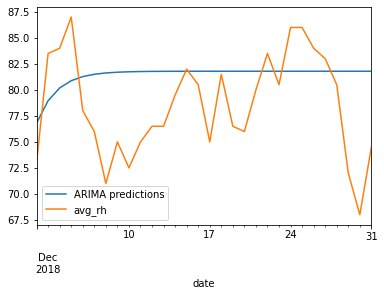

In [216]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=new_estimator.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['avg_rh'].plot(legend=True)


In [217]:
pred

2018-12-02    76.802897
2018-12-03    78.960989
2018-12-04    80.185677
2018-12-05    80.880671
2018-12-06    81.275071
2018-12-07    81.498887
2018-12-08    81.625900
2018-12-09    81.697978
2018-12-10    81.738881
2018-12-11    81.762094
2018-12-12    81.775266
2018-12-13    81.782741
2018-12-14    81.786983
2018-12-15    81.789391
2018-12-16    81.790757
2018-12-17    81.791532
2018-12-18    81.791972
2018-12-19    81.792222
2018-12-20    81.792363
2018-12-21    81.792444
2018-12-22    81.792489
2018-12-23    81.792515
2018-12-24    81.792530
2018-12-25    81.792538
2018-12-26    81.792543
2018-12-27    81.792546
2018-12-28    81.792547
2018-12-29    81.792548
2018-12-30    81.792549
2018-12-31    81.792549
Freq: D, Name: ARIMA predictions, dtype: float64

In [194]:
test['avg_rh'].mean()

78.56666666666666

In [195]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['avg_rh']))
print(rmse)


5.709175972444209


In [218]:
#SARIMAX(train['avg_rh'], order=(1, 1, 1))
model2=SARIMAX(df4['avg_rh'],order=(1,1,1))
model2=model2.fit()
df4.tail()

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,avg_rh
date,
2018-12-27,83.0
2018-12-28,80.5
2018-12-29,72.0
2018-12-30,68.0
2018-12-31,74.5


# For Future Dates

In [219]:

index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df4),end=len(df4)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)
     

2018-12-30    76.255074
2018-12-31    77.253387
2019-01-01    77.821244
2019-01-02    78.144250
2019-01-03    78.327981
2019-01-04    78.432490
2019-01-05    78.491936
2019-01-06    78.525750
2019-01-07    78.544984
2019-01-08    78.555925
2019-01-09    78.562148
2019-01-10    78.565688
2019-01-11    78.567701
2019-01-12    78.568847
2019-01-13    78.569498
2019-01-14    78.569869
2019-01-15    78.570080
2019-01-16    78.570199
2019-01-17    78.570268
2019-01-18    78.570306
2019-01-19    78.570329
2019-01-20    78.570341
2019-01-21    78.570348
2019-01-22    78.570352
2019-01-23    78.570355
2019-01-24    78.570356
2019-01-25    78.570357
2019-01-26    78.570357
2019-01-27    78.570357
2019-01-28    78.570357
2019-01-29    78.570358
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

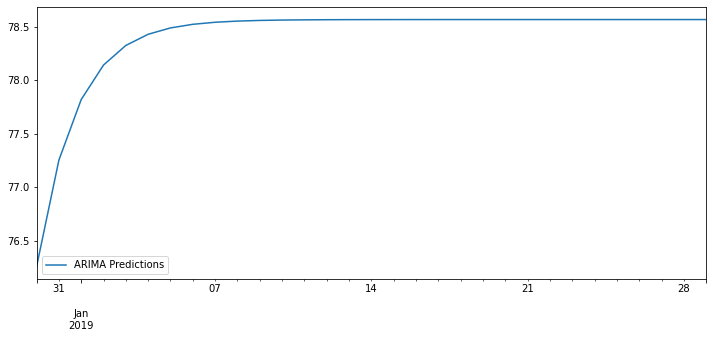

In [220]:

pred.plot(figsize=(12,5),legend=True)

In [120]:
#checking if model is overfitted
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error
from math import sqrt

train_start='2012-01-01'
train_end='2018-12-01'
test_start='2018-12-02'
test_end='2018-12-31'

# define the order of the ARIMA model
p = 1
d = 1
q = 1

# define the L1 regularization strength
#alpha = 0.1

# create the SARIMAX model with L1 regularization
model = SARIMAX(train, order=(p,d,q),  enforce_invertibility=False, alpha=alpha)


# fit the model to the training data
results = model.fit()

# Make predictions on the training data
train_predictions = results.predict(start=train_start, end=train_end)

# make predictions on the test data
test_predictions = results.predict(start=test_start, end=test_end)

# Calculate the root mean squared error (RMSE) for both the training and testing predictions
train_rmse = mean_squared_error(train, train_predictions, squared=False)
test_rmse = mean_squared_error(test, test_predictions, squared=False)

# Compare the RMSE values for the training and testing predictions
if train_rmse < test_rmse:
    print("The model is potentially overfitted")
else:
    print("The model is not overfitted")


print(test_rmse)

The model is potentially overfitted
5.709156243297411


In [62]:
#finding the best order

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt

# # Split data into training and testing sets
# train = df[:n_train]
# test = df[n_train:]

# Define range of hyperparameters to search over
p_range = range(0, 2)
d_range = [0, 1]
q_range = range(0, 2)

# Initialize variables to store best hyperparameters and best performance
best_mse = float('inf')
best_order = None

# Iterate over all combinations of hyperparameters
for p in p_range:
    for d in d_range:
        for q in q_range:
            # Fit ARIMA model on training data
            model = auto_arima(train, start_p=p, start_q=q, d=d,
                               max_p=3, max_q=3, max_d=2,
                               seasonal=False, trace=False,
                               suppress_warnings=True, stepwise=True)
            # Make predictions on testing data
            preds = model.predict(n_periods=len(test))
            # Evaluate performance using RMSE
            mse = mean_squared_error(test, preds)
            rmse = sqrt(mse)
            # Check if current hyperparameters result in best performance
            if rmse < best_mse:
                best_mse = rmse
                best_order = (p, d, q)

print("Best order:", best_order)


Best order: (0, 0, 0)


In [115]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error
from math import sqrt

train_start='2012-01-01'
train_end='2018-12-01'
test_start='2018-12-02'
test_end='2018-12-31'

# define the order of the ARIMA model
p = 0
d = 0
q = 0

# define the L1 regularization strength
#alpha = 0.1

# create the SARIMAX model with L1 regularization
model = SARIMAX(train, order=(p,d,q))


# fit the model to the training data
results = model.fit()

# Make predictions on the training data
train_predictions = results.predict(start=train_start, end=train_end)

# make predictions on the test data
test_predictions = results.predict(start=test_start, end=test_end)

# Calculate the root mean squared error (RMSE) for both the training and testing predictions
train_rmse = mean_squared_error(train, train_predictions, squared=False)
test_rmse = mean_squared_error(test, test_predictions, squared=False)

# Compare the RMSE values for the training and testing predictions
if train_rmse < test_rmse:
    print("The model is potentially overfitted")
else:
    print("The model is not overfitted")


print(test_rmse)

The model is not overfitted
78.71594501751217


In [116]:
print(train_rmse,test_rmse)

83.58335057812796 78.71594501751217


<AxesSubplot:>

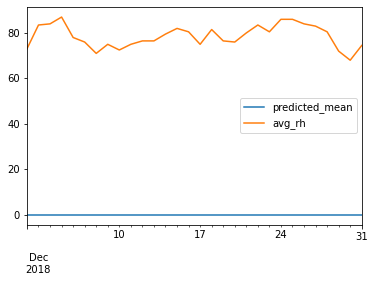

In [117]:

# start=len(train)
# end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
#pred=results.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
test_predictions.plot(legend=True)
test['avg_rh'].plot(legend=True)


In [118]:
test_predictions

2018-12-02    0.0
2018-12-03    0.0
2018-12-04    0.0
2018-12-05    0.0
2018-12-06    0.0
2018-12-07    0.0
2018-12-08    0.0
2018-12-09    0.0
2018-12-10    0.0
2018-12-11    0.0
2018-12-12    0.0
2018-12-13    0.0
2018-12-14    0.0
2018-12-15    0.0
2018-12-16    0.0
2018-12-17    0.0
2018-12-18    0.0
2018-12-19    0.0
2018-12-20    0.0
2018-12-21    0.0
2018-12-22    0.0
2018-12-23    0.0
2018-12-24    0.0
2018-12-25    0.0
2018-12-26    0.0
2018-12-27    0.0
2018-12-28    0.0
2018-12-29    0.0
2018-12-30    0.0
2018-12-31    0.0
Freq: D, Name: predicted_mean, dtype: float64

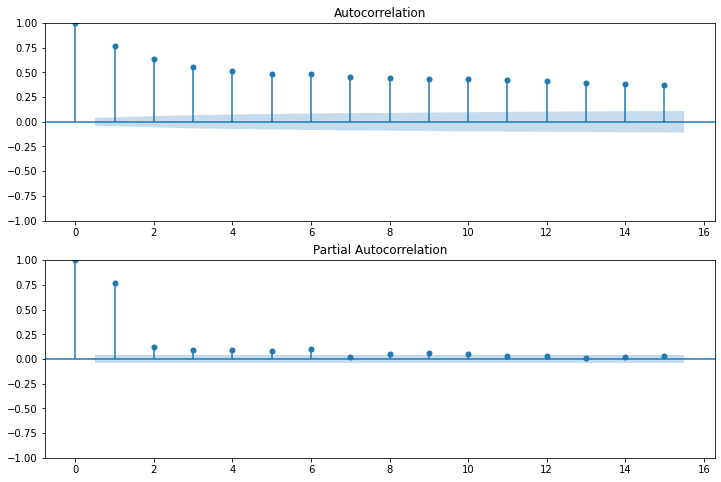

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, ax = plt.subplots(2, figsize=(12,8))
plot_acf(df4, lags = 15, ax=ax[0])
plot_pacf(df4, lags = 15, method = "ols", ax=ax[1])
plt.show()

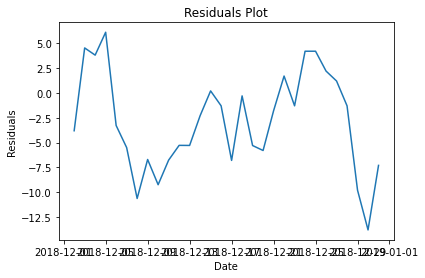

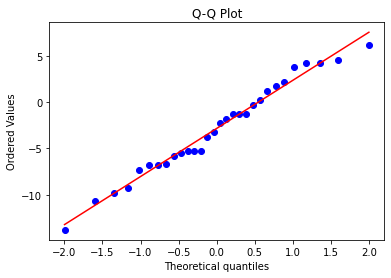

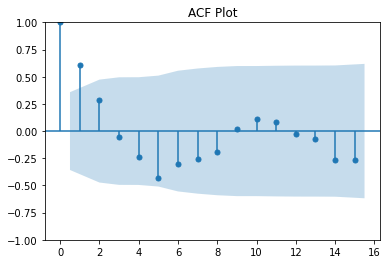

E:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


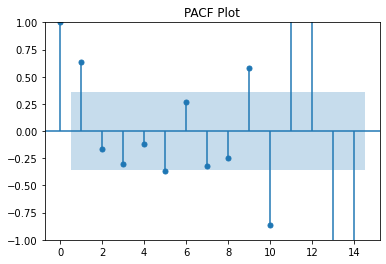

Mean Absolute Error: 4.722694074482418
Mean Squared Error: 32.5944650103818
Root Mean Squared Error: 5.709156243297411


In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate residuals
residuals = test['avg_rh'] - test_predictions

# Plot residuals over time
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Check for normal distribution of residuals
import scipy.stats as stats
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Check for autocorrelation in residuals
plot_acf(residuals)
plt.title('ACF Plot')
plt.show()

plot_pacf(residuals, lags=14)
plt.title('PACF Plot')
plt.show()

# Calculate MAE, MSE, and RMSE of residuals
mae = mean_absolute_error(test['avg_rh'], test_predictions)
mse = mean_squared_error(test['avg_rh'], test_predictions)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

In [130]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df4['avg_rh'], model='additive', period=365)


<AxesSubplot:>

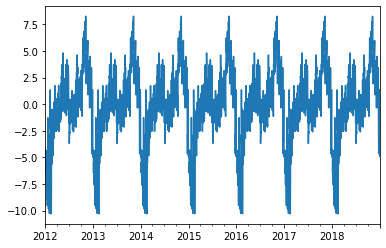

In [131]:
seasonal = result.seasonal
seasonal.plot()


In [144]:
import pmdarima as pm
modelS = pm.auto_arima(train['avg_rh'], seasonal=True, m=12, suppress_warnings=True)


In [154]:
start=len(train)
end=len(train)+len(test)-1

test_start='2018-12-02'
test_end='2018-12-31'

predS=modelS.predict(start=test_start,end=test_end).rename('ARIMA predictions')
predS

2018-12-02    76.802897
2018-12-03    78.960989
2018-12-04    80.185677
2018-12-05    80.880671
2018-12-06    81.275071
2018-12-07    81.498887
2018-12-08    81.625900
2018-12-09    81.697978
2018-12-10    81.738881
2018-12-11    81.762094
Freq: D, Name: ARIMA predictions, dtype: float64

<AxesSubplot:>

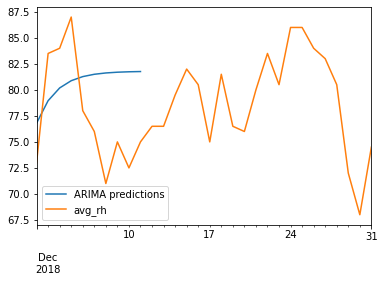

In [155]:
# start=len(train)
# end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
#pred=modelS.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
predS.plot(legend=True)
test['avg_rh'].plot(legend=True)


In [156]:
test

,avg_rh
2018-12-02,73.0
2018-12-03,83.5
2018-12-04,84.0
2018-12-05,87.0
2018-12-06,78.0
2018-12-07,76.0
2018-12-08,71.0
2018-12-09,75.0
2018-12-10,72.5
2018-12-11,75.0


In [157]:
train

,avg_rh
2012-01-01,91.0
2012-01-02,90.0
2012-01-03,89.0
2012-01-04,89.0
2012-01-05,95.0
...,...
2018-11-27,81.5
2018-11-28,92.5
2018-11-29,86.0
2018-11-30,84.0
